## The Percepton 
Using Python Classes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x1 = np.array([0., 0., 1., 1.], dtype = np.float32)
x2 = np.array([0., 1., 0., 1.], dtype = np.float32)

`What is the dot after 0` \
`What is a floating pont number?`\
`How do you fo flo`\
`If you don't care about precision and space you can use the 32 bit float`


In [3]:
y = np.array([0,0,0,1], dtype = int)

`The 0 with no decimal means integer`

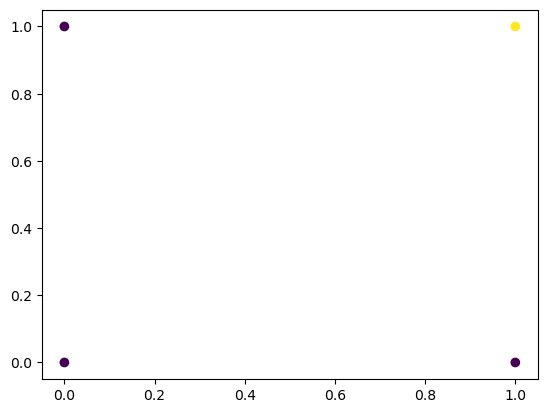

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x1, x2, c=y)

In [5]:
# Repeat the numbers from x1, x2 and y 50 times each
# For example for x1, each element of x1 will be repeated 50 times, so there will be 200 sample points at the end of it
x1 = np.repeat(x1, 50) # This is a vector/aray
x2 = np.repeat(x2, 50) # This is a vector/aray
y = np.repeat(y, 50) # This is a vector/aray

In [6]:
# Add random noise to data points


x1 = x1 + np.random.rand(x1.shape[0])*0.05
x2 = x2 + np.random.rand(x2.shape[0])*0.05

x1

array([2.60784605e-02, 4.55270391e-02, 4.90992563e-02, 1.44506884e-02,
       2.94876714e-02, 3.05949815e-02, 3.14225569e-02, 2.41511009e-02,
       1.40550759e-02, 3.64756643e-02, 7.41394209e-03, 3.16440532e-02,
       2.47558870e-02, 2.97552695e-04, 3.30303386e-02, 8.18555286e-03,
       4.02055193e-02, 4.37624321e-02, 4.28894853e-02, 2.92790656e-02,
       2.80607671e-02, 3.44163846e-03, 3.36332532e-02, 8.67047817e-03,
       2.88259729e-02, 4.06762124e-02, 3.42634011e-03, 3.27442197e-02,
       2.61057720e-02, 6.14742523e-03, 2.33338562e-03, 1.73372022e-02,
       1.37318828e-02, 3.76449400e-02, 4.94852863e-02, 1.09394456e-02,
       3.97727830e-02, 1.86457230e-02, 1.60455094e-02, 2.49247753e-02,
       8.03120006e-04, 3.24889948e-02, 2.19072290e-02, 3.50978874e-03,
       4.61709690e-02, 2.63724073e-02, 1.17104478e-03, 3.23508494e-02,
       4.86153497e-02, 2.38408580e-02, 3.44654164e-02, 2.53897385e-02,
       2.36188437e-02, 3.10599686e-02, 3.43212742e-02, 3.75186305e-03,
      

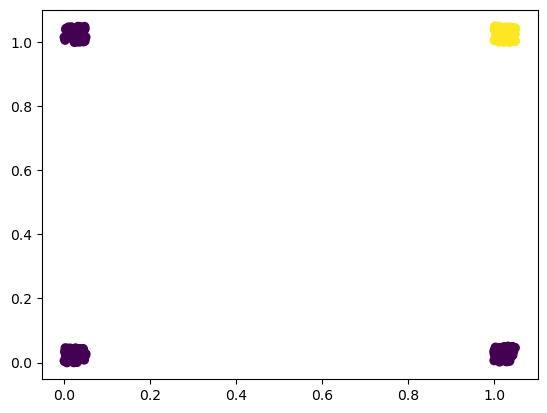

In [7]:
plt.scatter(x1, x2, c = y)

In [8]:
# Combine x1 and x2
X = np.column_stack((x1, x2))

In [9]:
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (200, 2)
y shape:  (200,)


In [10]:
# Diffusion
# We need to shuffle the index
# Generate indexes from 0 to 199
shuffle_idx = np.arange(y.shape[0])

In [17]:
# Random number generator with a seed
# It is not trully random, but just a pseudo-random
shuffle_rng = np.random.RandomState(42)
shuffle_rng.shuffle(shuffle_idx)

print('Shuffled indices: ', shuffle_idx)

Shuffled indices:  [194 177   9  17  81 123 136  48 160 195  42 149  54 100  99  37 140  89
  46  90  25  56  91  33 119 169 191 189  23  94  45  82  73 113 176 109
 138 105  63  26 111  92 164  65 155 106 132  68  49 161  70  57 115 184
  44  41 180  27  21 159  58   6  18 165 104  28  38  74  22   3 173 147
 167 197 163 153  84 133   4   0  30 139  29 116 199  85 134 135 121  97
 148 178  32  75 182  71  72  69  67  40 128  55 185  34 146  80  66  31
 198   7 107  95 179   8  51 156  35 122 183 125  79 112  59 171  60  93
 151 110  77  76 196  19  11  13  24  53 158 144 126 154   1 157 103  86
   2 150 170 166 141 187 129  52  61 174  78  96  88  47 152 162 192  43
  50 130  12 117  62 114  14 172 143 190  16  98 175  20  39 137 131 188
  15   5  83 168 181 145 120  64  36 118 108 102 124  87 127  10 186 101
 193 142]


In [12]:
X, y = X[shuffle_idx], y[shuffle_idx]
# ???? What does this syntax do

split_point = int(0.7 * X.shape[0])

X_train, X_test = X[shuffle_idx[:split_point]], X[shuffle_idx[split_point:]] 
# ??? What is this colon notation
y_train, y_test = y[shuffle_idx[:split_point]], y[shuffle_idx[split_point:]]

In [13]:
# Normalisation (zero mean, unit variance)
# When axis is 0, you are doing an operation across rows. When doing axis = 1, it is an operation across columns
# We only need the mean and variance for the training data set because is the one used by the machine to learn
mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

print('zero mean: ', mu)
print('unit variance(standard deviation): ', sigma)

X_train = (X_train - mu) /sigma
X_test = (X_test - mu) /sigma

zero mean:  [0.49073469 0.53328198]
unit variance(standard deviation):  [0.49798145 0.50055003]


In [14]:
np.zeros((3,1), dtype = float)

array([[0.],
       [0.],
       [0.]])

In [15]:
class Perceptron():
    def _init_(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype = float)
        self.bias = np.zeroes((1,), dtype = float)